In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [3]:
train_data = unpickle('data/train')
test_data = unpickle('data/test')
labels = unpickle('data/meta')
interesting_coarse_labels = [0, 1]  # Aquatic mammals and Fish


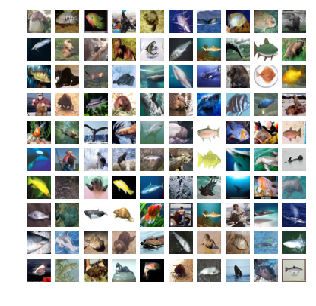

In [4]:
train = []
y = []
test = []
y_test = []
for i in range(len(train_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if train_data[b'coarse_labels'][i] == j:
            train.append(train_data[b'data'][i])
            y.append(j)
            break

for i in range(len(test_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if test_data[b'coarse_labels'][i] == j:
            test.append(test_data[b'data'][i])
            y_test.append(j)
            break

train = np.array(train)
y = np.array(y)
test = np.array(test)
y_test = np.array(y_test)
train_reshaped = train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_reshaped = test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Visualizing CIFAR 100
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(train_reshaped)))
        axes[j][k].set_axis_off()
        axes[j][k].imshow(train_reshaped[i:i + 1][0])


In [82]:
import numpy as np


class LogisticRegression:
    def __init__(self):
        self.X = None
        self.y = None
        self.w = None
        return

    @staticmethod
    def sigmoid(y):
        y = np.clip(y, -500, 500)
        return 1.0 / (1.0 + np.exp(-y))

    @staticmethod
    def log_loss(y, ypred):
        eps = 10 ** -15
        ypred = np.clip(ypred, eps, 1 - eps)
        total_cost = -np.sum(y * np.log(ypred) + np.subtract(1, y) * np.log(np.subtract(1, ypred)))
        return total_cost / np.shape(ypred)[1]

    @staticmethod
    def get_updated_weights(w, learning_rate, x, y, ypred):
        w = w - (learning_rate * np.dot((ypred - y), np.transpose(x)))
        return w

    def train(self, x, y, iteration=100, learning_rate=1):
        number_of_samples = np.shape(x)[1]
        bias = np.repeat(1, number_of_samples).reshape((1, number_of_samples))
        self.X = np.concatenate((bias, x))
        self.X = self.X - np.mean(self.X, axis=0)
        self.X /= np.std(self.X, axis=0)
        self.y = y
        labels_count = len(np.unique(self.y))
        self.w = np.zeros((labels_count, np.shape(self.X)[0]))

        for i in range(iteration):
            ypred = self.sigmoid(self.w.dot(self.X))
            loss = self.log_loss(y, ypred)
            if i % 100 == 0:
                print("Iteration ", i, " and loss ", loss)
            self.w = self.get_updated_weights(self.w, learning_rate, self.X, y, ypred)

        return ypred

    def predict(self, x_test):
        x_test = np.concatenate(([1], x_test))
        return np.argmax(self.sigmoid(self.w.dot(x_test)))

    def accuracy(self, test, y_test):
        success = 0
        number_of_samples = np.shape(test_reshaped)[1]
        for i in range(number_of_samples):
            if self.predict(test[:, i]) == y_test[i]:
                success += 1
        print(success)
        return (success / number_of_samples) * 100


In [83]:
nn = LogisticRegression()
x1 = np.array([[1, 0], [0, 1], [1, 0]])
y1 = np.array([[1, 0], [0, 1]])
nn.train(x1, y1, iteration=2, learning_rate=10)

Iteration  0  and loss  1.38629436112


array([[  1.00000000e+00,   1.99209315e-14],
       [  1.99209315e-14,   1.00000000e+00]])

In [94]:
nn = LogisticRegression()
# x = np.array([[1, 0], [0, 1]])
# y = np.array([[1, 0], [0, 1]])
# nn.train(x, y, iteration=2, learning_rate=10)
y_reshaped = []
for i in y:
    if i == 0:
        y_reshaped.append([1, 0])
    else:
        y_reshaped.append([0, 1])
y_reshaped = np.transpose(np.array(y_reshaped))
train_reshaped = np.transpose(train)
nn.train(train_reshaped[:, :], y_reshaped[:, :], iteration=5000, learning_rate=0.1)
print(y_reshaped)

Iteration  0  and loss  1.38629436112


Iteration  100  and loss  26.5209643232


Iteration  200  and loss  25.6116427764


Iteration  300  and loss  25.2138671008


Iteration  400  and loss  25.1343545526


Iteration  500  and loss  24.5677978759


Iteration  600  and loss  24.2194481323


Iteration  700  and loss  24.1998257609


Iteration  800  and loss  24.3875090112


Iteration  900  and loss  23.9161886401


Iteration  1000  and loss  23.8902570649


Iteration  1100  and loss  23.5480308878


Iteration  1200  and loss  23.6009227998


Iteration  1300  and loss  23.4964274631


Iteration  1400  and loss  23.6422597516


Iteration  1500  and loss  22.8850149252


Iteration  1600  and loss  22.7988472775


Iteration  1700  and loss  22.5636720208


Iteration  1800  and loss  22.9921412729


Iteration  1900  and loss  23.0652009643


Iteration  2000  and loss  23.087895435


Iteration  2100  and loss  22.4823289199


Iteration  2200  and loss  22.6093519387


Iteration  2300  and loss  22.4304993187


Iteration  2400  and loss  22.3846485351


Iteration  2500  and loss  22.6086270376


Iteration  2600  and loss  22.1702075399


Iteration  2700  and loss  22.1495739957


Iteration  2800  and loss  22.697240476


Iteration  2900  and loss  22.0282811536


Iteration  3000  and loss  21.900119343


Iteration  3100  and loss  22.253917165


Iteration  3200  and loss  21.9974284065


Iteration  3300  and loss  21.7514646539


Iteration  3400  and loss  21.4507886616


Iteration  3500  and loss  21.8977587429


Iteration  3600  and loss  21.5308658883


Iteration  3700  and loss  21.6431565352


Iteration  3800  and loss  21.8688032073


Iteration  3900  and loss  21.2326667687


Iteration  4000  and loss  21.4180366885


Iteration  4100  and loss  21.9435109722


Iteration  4200  and loss  21.1328979958


Iteration  4300  and loss  21.0452851266


Iteration  4400  and loss  21.7895804138


Iteration  4500  and loss  21.3186026448


Iteration  4600  and loss  21.227848241


Iteration  4700  and loss  21.1621688938


Iteration  4800  and loss  20.8950006867


Iteration  4900  and loss  21.1851559551


[[0 0 1 ..., 1 0 0]
 [1 1 0 ..., 0 1 1]]


In [ ]:
test_reshaped = np.transpose(test)
nn.accuracy(test_reshaped, y_test)


621


62.1